In [33]:
# Setting up directory path to be able to use unified paths and imports
%run ./notebook_setup.py
setup_paths(parent_steps=1)

c:\HDD\Interview\Raisa\Notebooks\..


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv("../Data/Task.csv")
df = data.dropna().copy()
df.drop("WellID", inplace=True, axis=1)
df

,BVHH,FormationAlias,NioGOR,CodGOR,LateralLength,ProppantPerFoot,FluidPerFoot,LeftDistance,LeftNeighbourType,RightDistance,RightNeighbourType,TVD,NormalizedOilEUR,NormalizedGasEUR
6,1.392838,NIOBRARA,3769.822078,3171.787991,4273.0,955.707933,1027.864732,601.0,Codeveloped,569.0,Parent,7949.0,10.016148,64.465247
17,1.456688,NIOBRARA,1899.440485,1423.597262,10027.0,967.188591,903.149097,739.0,Parent,216.0,Codeveloped,7588.0,18.284133,68.490476
43,0.743617,CODELL,2015.921927,1934.851351,15624.0,941.116231,752.986559,761.0,Codeveloped,1838.0,Parent,7964.0,30.318932,141.680044
44,1.542139,NIOBRARA,2083.364014,1978.362575,14942.0,942.310266,960.239058,389.0,Codeveloped,2290.0,Parent,7600.0,25.248561,108.144291
45,1.570849,NIOBRARA,2072.565664,1978.148085,15634.0,940.514264,972.548548,304.0,Codeveloped,389.0,Codeveloped,7781.0,19.259371,110.738966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9162,1.018615,CODELL,772.927941,699.642237,9642.0,498.029454,404.248911,891.0,Codeveloped,884.0,Codeveloped,8228.0,15.266646,10.746318
9166,0.760447,CODELL,1059.228543,691.616351,9995.0,804.402201,577.763982,1148.0,Codeveloped,2141.0,Parent,8741.0,14.971986,9.493947
9168,1.010803,CODELL,666.421955,837.587977,9825.0,792.883461,1477.356132,1922.0,Codeveloped,1049.0,Codeveloped,8724.0,20.876132,31.558473
9175,1.195502,CODELL,929.628018,914.245976,9788.0,799.754802,729.764201,1303.0,Codeveloped,1232.0,Codeveloped,8480.0,20.645689,34.311504


## PCA

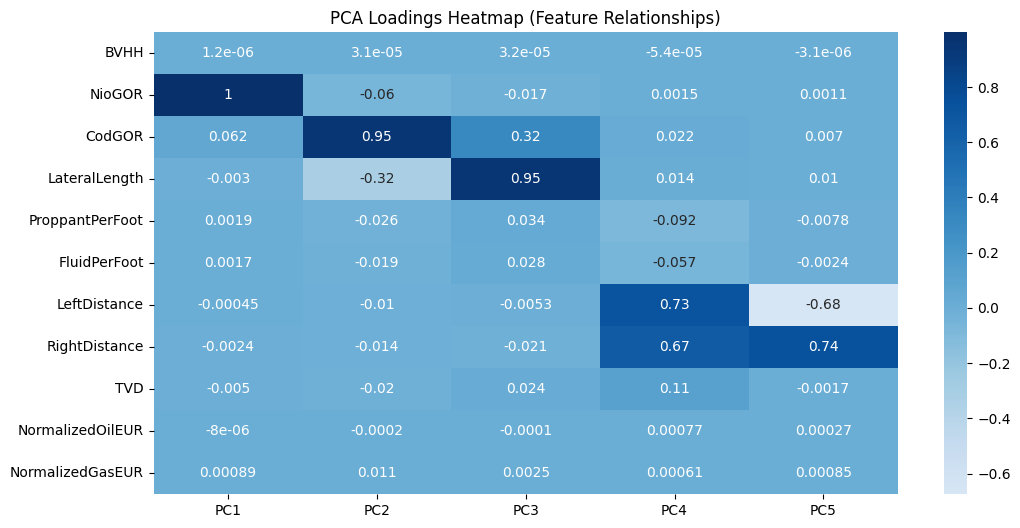

In [36]:
from sklearn.decomposition import PCA

# Assuming df is your cleaned DataFrame of numerical features
X = df.select_dtypes(include='number').drop(["WellID"], axis=1)

n_components = 5

pca = PCA(n_components=n_components)
pca.fit(X)

# Get principal components
X_pca = pca.transform(X)

components = pca.fit_transform(X)

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=X.columns
)

plt.figure(figsize=(12, 6))
sns.heatmap(loadings, annot=True, cmap="Blues", center=0)
plt.title("PCA Loadings Heatmap (Feature Relationships)")
plt.show()

## MI

In [54]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

X = df.drop(["NormalizedOilEUR", "NormalizedGasEUR", "FormationAlias", "LeftNeighbourType", "RightNeighbourType"], inplace=False, axis=1)
y = df[["NormalizedOilEUR"]]


# For regression
mi = mutual_info_regression(X, y)

mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

# Or between features
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

mi_matrix = pd.DataFrame(index=X.columns, columns=X.columns)

for i in X.columns:
    mi_matrix[i] = mutual_info_regression(X, X[i])

mi_matrix

c:\Users\adamf\anaconda3\envs\ml_latest\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,BVHH,NioGOR,CodGOR,LateralLength,ProppantPerFoot,FluidPerFoot,LeftDistance,RightDistance,TVD
BVHH,7.102138,0.378093,0.505659,0.312520,0.302997,0.217337,0.078106,0.080522,0.377484
NioGOR,0.378136,7.086534,1.410694,0.484028,0.268512,0.199018,0.103964,0.110034,0.355783
CodGOR,0.505705,1.410678,7.084628,0.552802,0.358421,0.259889,0.105388,0.110199,0.500557
LateralLength,0.312610,0.484330,0.552669,6.954535,0.409155,0.293561,0.052111,0.038281,0.300031
ProppantPerFoot,0.303032,0.268474,0.358442,0.408912,7.095898,0.700374,0.161015,0.173245,0.344228
FluidPerFoot,0.217337,0.199022,0.259875,0.293695,0.700374,7.102197,0.057043,0.070104,0.236404
LeftDistance,0.078223,0.103479,0.105168,0.051714,0.160727,0.057517,6.644707,0.263721,0.152606
RightDistance,0.080867,0.109507,0.109543,0.038837,0.173284,0.070153,0.263778,6.638245,0.127792
TVD,0.376836,0.355593,0.500265,0.300850,0.344655,0.236235,0.153044,0.128959,6.702329


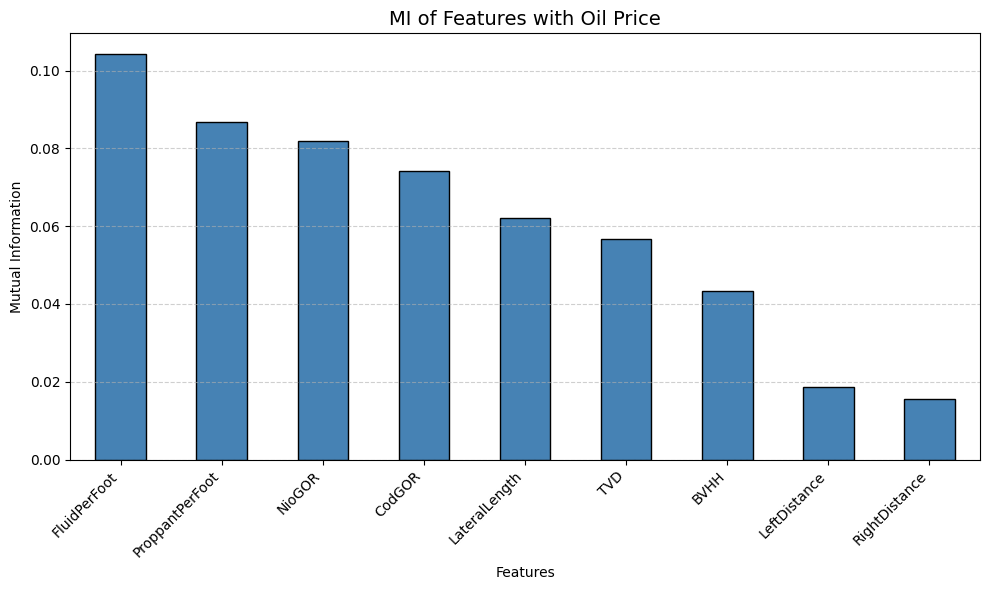

In [62]:

# Step 2: Plot
plt.figure(figsize=(10, 6))
mi_series.plot(kind="bar", color="steelblue", edgecolor="black")
plt.title("MI of Features with Oil Price", fontsize=14)
plt.ylabel("Mutual Information")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

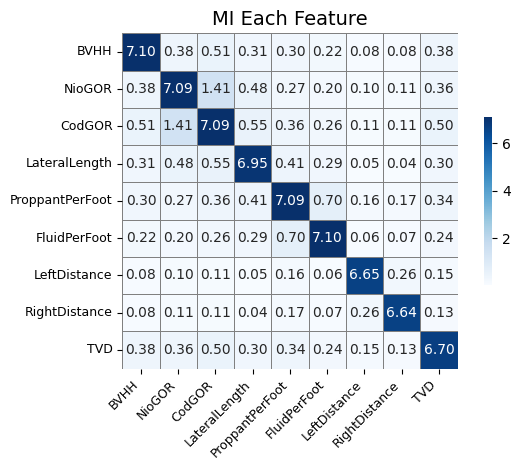

In [ ]:
heatmap = sns.heatmap(
            mi_matrix,
            annot=True,
            cmap="Blues",
            fmt=".2f",
            square=True,
            cbar_kws={"shrink": 0.5},
            linewidths=0.5,
            linecolor="gray",
        )
plt.title("MI Each Feature", fontsize=14)
heatmap.set_xticklabels(
    heatmap.get_xticklabels(), rotation=45, ha="right", fontsize=9
)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

In [8]:
import dcor
dcor.distance_correlation(data["BVHH"], data["NormalizedOilEUR"])

ModuleNotFoundError: No module named 'dcor'